In [ ]:
Тоimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

import re
import time
from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

import numpy as np

from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/master.csv')

In [ ]:
df.shape

(27820, 12)

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
cleanup_nums = {'sex': {'male': 0, 'female': 1}, 'generation': {'Generation X': 1, 'Silent': 0, 'G.I. Generation': 2, 'Boomers': 3, 'Millenials': 4, 'Generation Z': 5}}
df = df.replace(cleanup_nums)

In [ ]:
def means(arr):
    return str(np.array(arr).mean())


df.age.replace(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

In [ ]:
df.dtypes

country               object
year                   int64
sex                    int64
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
gdp_for_year          object
gdp_per_capita         int64
generation             int64
dtype: object

In [ ]:
df.drop("country-year",axis=1, inplace=True)
df.drop("country",axis=1, inplace=True)

In [ ]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(",", "").astype("int")

In [ ]:
df.dtypes

year                   int64
sex                    int64
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_for_year           int64
gdp_per_capita         int64
generation             int64
dtype: object

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isna().sum()

year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
HDI for year         0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64

In [ ]:
df.head(10)

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
72,1995,0,29.5,13,232900,5.58,0.619,2424499009,835,1
73,1995,0,64.5,9,178000,5.06,0.619,2424499009,835,0
74,1995,1,75.0,2,40800,4.90,0.619,2424499009,835,2
75,1995,1,19.5,13,283500,4.59,0.619,2424499009,835,1
76,1995,0,19.5,11,241200,4.56,0.619,2424499009,835,1
77,1995,0,75.0,1,25100,3.98,0.619,2424499009,835,2
78,1995,0,44.5,14,375900,3.72,0.619,2424499009,835,3
79,1995,1,29.5,7,264000,2.65,0.619,2424499009,835,1
80,1995,1,44.5,8,356400,2.24,0.619,2424499009,835,3
81,1995,0,9.5,6,376500,1.59,0.619,2424499009,835,4


,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
year,1.000000e+00,-7.008043e-16,-0.024297,-0.012628,-0.077410,3.667862e-01,7.910509e-02,2.978880e-01,2.580389e-01
sex,-7.008043e-16,1.000000e+00,-0.158373,0.009092,-0.406362,-2.331707e-17,-2.105455e-16,-1.808962e-16,-3.122478e-17
suicides_no,-2.429726e-02,-1.583726e-01,1.000000,0.698758,0.237169,1.513987e-01,6.072031e-01,1.051824e-01,-8.048915e-02
population,-1.262776e-02,9.091930e-03,0.698758,1.000000,-0.023197,1.029435e-01,7.502960e-01,7.370115e-02,7.867536e-03
suicides/100k pop,-7.741000e-02,-4.063617e-01,0.237169,-0.023197,1.000000,7.427907e-02,2.023085e-02,-2.339023e-03,-2.428400e-01
HDI for year,3.667862e-01,-2.331707e-17,0.151399,0.102943,0.074279,1.000000e+00,3.051935e-01,7.712278e-01,9.466219e-02
gdp_for_year,7.910509e-02,-2.105455e-16,0.607203,0.750296,0.020231,3.051935e-01,1.000000e+00,2.756430e-01,2.309045e-02
gdp_per_capita,2.978880e-01,-1.808962e-16,0.105182,0.073701,-0.002339,7.712278e-01,2.756430e-01,1.000000e+00,8.339947e-02
generation,2.580389e-01,-3.122478e-17,-0.080489,0.007868,-0.242840,9.466219e-02,2.309045e-02,8.339947e-02,1.000000e+00


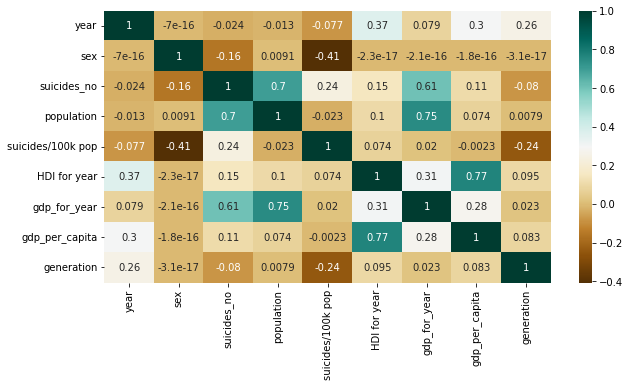

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
df['fatality_rate'] = np.where(df['suicides/100k pop']>df['suicides/100k pop'].mean(), 1, 0)

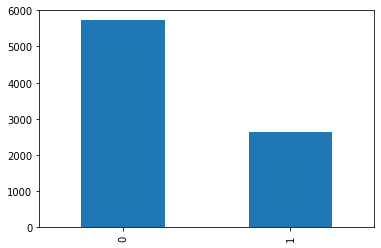

In [ ]:
df["fatality_rate"].value_counts().plot(kind='bar')

In [ ]:
X = df.drop(['fatality_rate', 'suicides/100k pop'], axis=1)
y = df['fatality_rate']

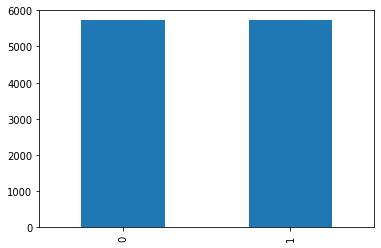

In [ ]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)
y.value_counts().plot(kind='bar')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler #проепроцессинг
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
models = {"Random Forest Classifier": RandomForestClassifier(),  #словарь моделей
          "Logistic Regression": LogisticRegression(max_iter = 200), 
          "KNeighbors Classifier": KNeighborsClassifier(),
          "DesicisonTree Classifier": DecisionTreeClassifier(),
          "XGB Classifier": XGBClassifier(),
          "Bayes": GaussianNB(),
          "SVM": svm.LinearSVC(penalty='l2',multi_class='ovr')}

def fit_and_score (models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for names, model in models.items():
        model.fit(X_train, y_train)
        model_scores[names] = model.score(X_test, y_test)

        y_pred = model.predict(X_test)
        print('=================================================')
        print(names)
        print("Classification report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        cf_matrix = confusion_matrix(y_test,y_pred)
        print(cf_matrix)

        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Real Values ');
        plt.show()
        
    return model_scores #функция обучения и вывода данных

Random Forest Classifier
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1934
           1       0.97      0.97      0.97      1842

    accuracy                           0.97      3776
   macro avg       0.97      0.97      0.97      3776
weighted avg       0.97      0.97      0.97      3776

Confusion Matrix:
[[1877   57]
 [  51 1791]]


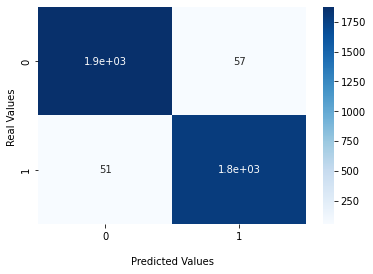

Logistic Regression
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1934
           1       0.89      0.92      0.90      1842

    accuracy                           0.91      3776
   macro avg       0.91      0.91      0.91      3776
weighted avg       0.91      0.91      0.91      3776

Confusion Matrix:
[[1734  200]
 [ 156 1686]]


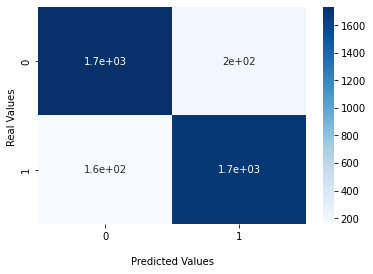

KNeighbors Classifier
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1934
           1       0.86      0.89      0.88      1842

    accuracy                           0.88      3776
   macro avg       0.88      0.88      0.88      3776
weighted avg       0.88      0.88      0.88      3776

Confusion Matrix:
[[1676  258]
 [ 198 1644]]


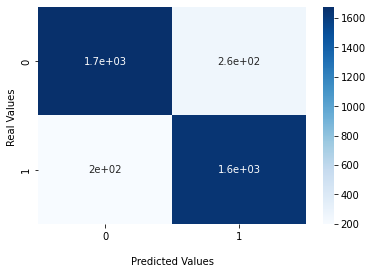

DesicisonTree Classifier
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1934
           1       0.96      0.97      0.96      1842

    accuracy                           0.96      3776
   macro avg       0.96      0.96      0.96      3776
weighted avg       0.96      0.96      0.96      3776

Confusion Matrix:
[[1862   72]
 [  61 1781]]


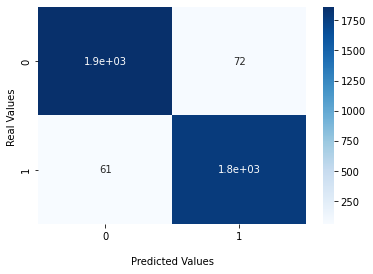

XGB Classifier
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1934
           1       0.95      0.98      0.97      1842

    accuracy                           0.97      3776
   macro avg       0.97      0.97      0.97      3776
weighted avg       0.97      0.97      0.97      3776

Confusion Matrix:
[[1848   86]
 [  32 1810]]


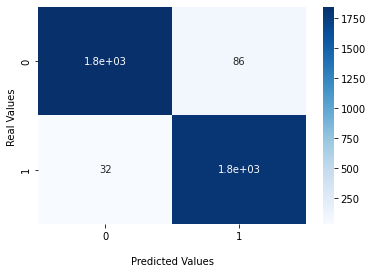

Bayes
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1934
           1       0.85      0.68      0.76      1842

    accuracy                           0.79      3776
   macro avg       0.80      0.79      0.78      3776
weighted avg       0.80      0.79      0.79      3776

Confusion Matrix:
[[1715  219]
 [ 582 1260]]


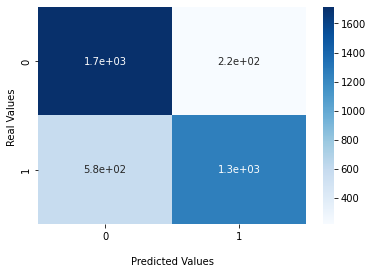

SVM
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1934
           1       0.92      0.95      0.93      1842

    accuracy                           0.94      3776
   macro avg       0.94      0.94      0.94      3776
weighted avg       0.94      0.94      0.94      3776

Confusion Matrix:
[[1790  144]
 [ 100 1742]]


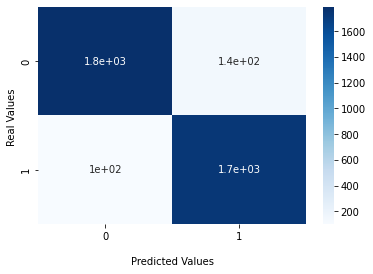

{'Random Forest Classifier': 0.9713983050847458,
 'Logistic Regression': 0.9057203389830508,
 'KNeighbors Classifier': 0.8792372881355932,
 'DesicisonTree Classifier': 0.9647775423728814,
 'XGB Classifier': 0.96875,
 'Bayes': 0.7878707627118644,
 'SVM': 0.9353813559322034}

In [ ]:
model_score = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_score

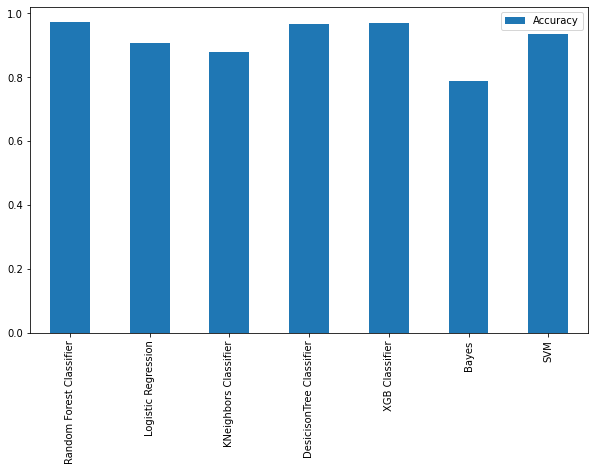

In [ ]:
model_compare = pd.DataFrame(model_score, index = ["Accuracy"])
model_compare.T.plot.bar(figsize = (10, 6)) #сравнение точности моделей

#Clustering

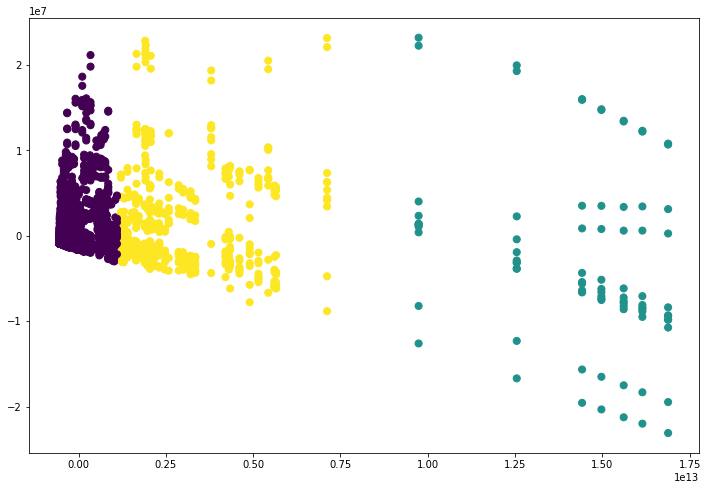

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#PCA
kmeans = KMeans(n_clusters=3, random_state=1).fit(df)

# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(df)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')

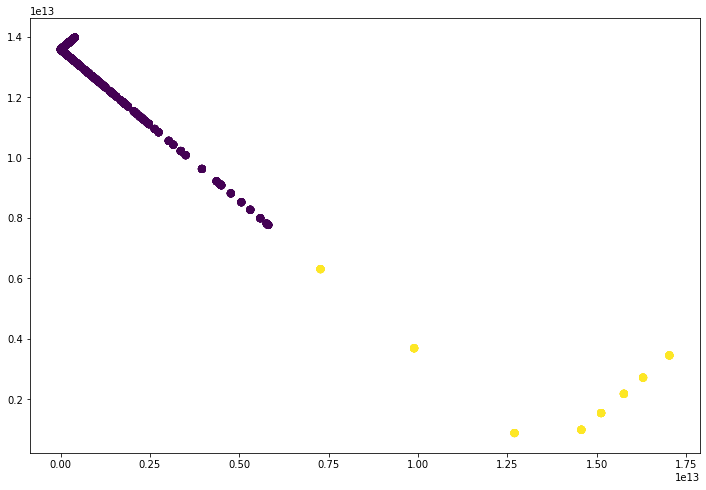

In [ ]:
#KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df)
res = kmeans.fit_transform(df)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')

16 clusters


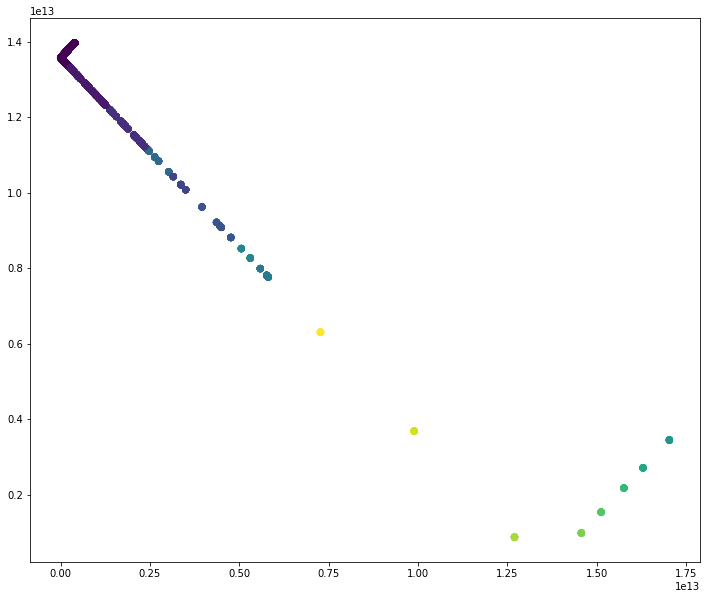

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#Mean Shift

bandwidth = estimate_bandwidth(df, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=8, max_iter=20).fit(df)
unique, counts = np.unique(ms.labels_, return_counts=True)

print(len(unique), "clusters")

plt.figure(figsize=(12, 10))
plt.scatter(
    res[:, 0],
    res[:, 1],
    c=ms.labels_,
    s=40,
    cmap=plt.cm.get_cmap("viridis"),
)

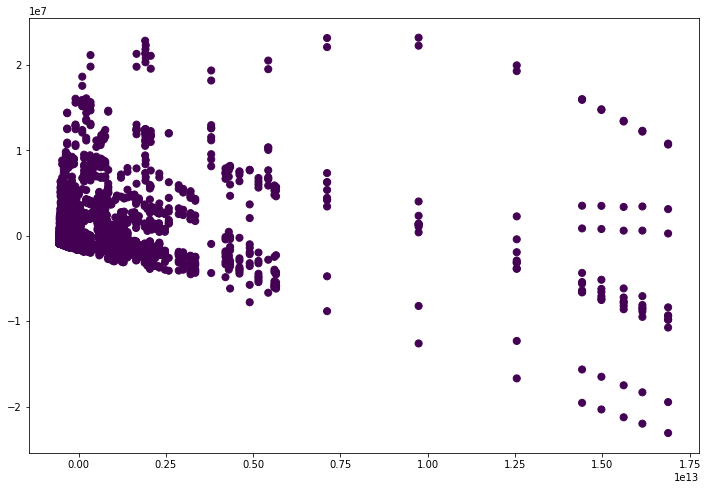

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=17, min_samples=11).fit(df)
#DBSCAN
pca = PCA(n_components=2)
res = pca.fit_transform(df)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=dbscan.labels_, s=50, cmap='viridis')

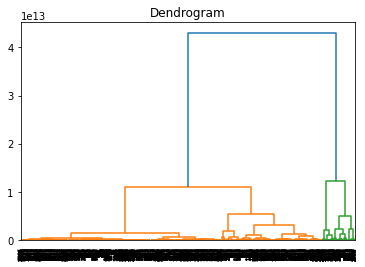

In [ ]:
sdf3000 = df[:3000]
#Иерархическая кластеризация
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

dendrogram = sch.dendrogram(sch.linkage(sdf3000, method = 'ward' ))
plt.title('Dendrogram')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
#Expectation-maximization
EM = GaussianMixture(n_components=3)
em_res = EM.fit_predict(df)

from sklearn.metrics import accuracy_score
plt.figure(figsize=(12, 10))

plt.scatter(
    res[:, 0],
    res[:, 1],
    c=em_res,
    s=40,
    cmap="viridis"
)